<a href="https://colab.research.google.com/github/itsamekadio/Numerical_Methods_Course/blob/main/BracketingMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import math
def f(x):
    return math.sin(x) + math.cos(1 + x**2) - 1


def bisectionMethod(xl, xu, imax, epsions):
    print("\nBisection Method")
    print(f"{'Iter':<5} {'xl':<10} {'xu':<10} {'xr':<10} {'εa (%)':<10} {'f(xr)':<10} {'Sign f(xr)':<10} {'f(xu)':<10} {'Sign f(xu)':<10}")
    print("=" * 90)

    iter = 0
    xr = 0
    ea = 100000000

    while True:
        xrold = xr
        xr = (xl + xu) / 2
        fr = f(xr)
        fu = f(xu)
        iter += 1

        if xr != 0:
            ea = abs((xr - xrold) / xr) * 100

        test = f(xl) * fr
        sign_xr = "Positive" if fr > 0 else "Negative"
        sign_xu = "Positive" if fu > 0 else "Negative"

        print(f"{iter:<5} {xl:<10.6f} {xu:<10.6f} {xr:<10.6f} {ea:<10.6f} {fr:<10.6f} {sign_xr:<10} {fu:<10.6f} {sign_xu:<10}")

        if test < 0:
            xu = xr
        elif test > 0:
            xl = xr
        else:
            ea = 0

        if ea < epsions or iter >= imax:
            break

    return xr

def falsepos(xl, xu, imax, epsions):
    print("\nFalse Position Method")
    print(f"{'Iter':<5} {'xl':<10} {'xu':<10} {'xr':<10} {'εa (%)':<10} {'f(xr)':<10} {'Sign f(xr)':<10} {'f(xu)':<10} {'Sign f(xu)':<10}")
    print("=" * 90)

    iter = 0
    xr1 = xl
    ea = 100

    for i in range(imax):
        xr = xu - (f(xu) * (xu - xl)) / (f(xu) - f(xl))
        fr = f(xr)
        fu = f(xu)

        if i > 0:
            ea = abs((xr - xr1) / xr) * 100

        sign_xr = "Positive" if fr > 0 else "Negative"
        sign_xu = "Positive" if fu > 0 else "Negative"

        print(f"{i+1:<5} {xl:<10.6f} {xu:<10.6f} {xr:<10.6f} {ea:<10.6f} {fr:<10.6f} {sign_xr:<10} {fu:<10.6f} {sign_xu:<10}")

        if ea < epsions:
            break

        if f(xl) * fr < 0:
            xu = xr
        else:
            xl = xr

        xr1 = xr

    return xr


# Running both methods
bisectionMethod(1.94, 1.95, 100, 1/1000)
falsepos(1.94, 1.95, 100, 1/1000)



Bisection Method
Iter  xl         xu         xr         εa (%)     f(xr)      Sign f(xr) f(xu)      Sign f(xu)
1     1.940000   1.950000   1.945000   100.000000 0.001376   Positive   0.018949   Positive  
2     1.940000   1.945000   1.942500   0.128700   -0.007410  Negative   0.001376   Positive  
3     1.942500   1.945000   1.943750   0.064309   -0.003017  Negative   0.001376   Positive  
4     1.943750   1.945000   1.944375   0.032144   -0.000820  Negative   0.001376   Positive  
5     1.944375   1.945000   1.944687   0.016069   0.000278   Positive   0.001376   Positive  
6     1.944375   1.944687   1.944531   0.008035   -0.000271  Negative   0.000278   Positive  
7     1.944531   1.944687   1.944609   0.004018   0.000003   Positive   0.000278   Positive  
8     1.944531   1.944609   1.944570   0.002009   -0.000134  Negative   0.000003   Positive  
9     1.944570   1.944609   1.944590   0.001004   -0.000065  Negative   0.000003   Positive  
10    1.944590   1.944609   1.944600   0.0

1.9446084251127589

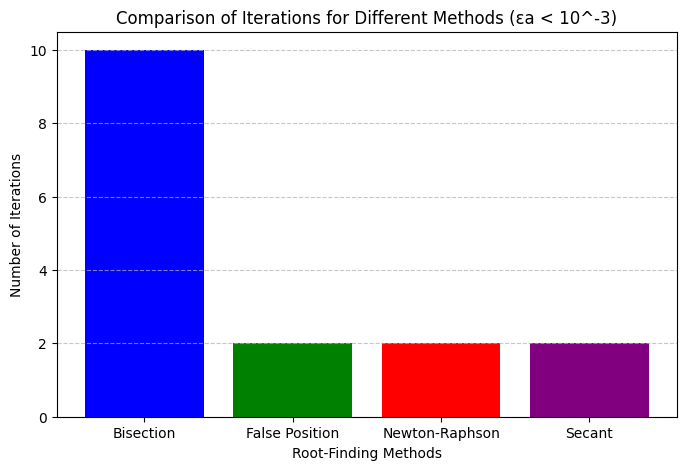

In [25]:
import math
import sympy as sp
import matplotlib.pyplot as plt

# Define function and derivative for Newton-Raphson
x = sp.Symbol('x')
f_expr = sp.sin(x) + sp.cos(x**2 + 1) - 1
f_dash_expr = sp.diff(f_expr, x)

f = sp.lambdify(x, f_expr, "math")
f_dash = sp.lambdify(x, f_dash_expr, "math")

# Bisection Method
def bisectionMethod(xl, xu, imax, eps):
    iter_count = 0
    xr = 0
    ea = 100000000

    while True:
        xrold = xr
        xr = (xl + xu) / 2
        iter_count += 1

        if xr != 0:
            ea = abs((xr - xrold) / xr) * 100

        test = f(xl) * f(xr)

        if test < 0:
            xu = xr
        elif test > 0:
            xl = xr
        else:
            ea = 0

        if ea < eps or iter_count >= imax:
            break

    return iter_count

# False Position Method
def falsepos(xl, xu, imax, eps):
    iter_count = 0
    xr1 = xl
    ea = 100

    for _ in range(imax):
        xr = xu - (f(xu) * (xu - xl)) / (f(xu) - f(xl))
        iter_count += 1

        if xr != 0:
            ea = abs((xr - xr1) / xr) * 100

        if ea < eps:
            break

        if f(xl) * f(xr) < 0:
            xu = xr
        else:
            xl = xr

        xr1 = xr

    return iter_count

# Newton-Raphson Method
def NewtonRaphson(x0, es, imax):
    xi = x0
    ea = 1000
    iter_count = 0

    while ea > es and iter_count < imax:
        fxi = f(xi)
        fxi_dash = f_dash(xi)
        x_next = xi - (fxi / fxi_dash)

        if x_next != 0:
            ea = abs((x_next - xi) / x_next) * 100

        xi = x_next
        iter_count += 1

    return iter_count

# Secant Method
def Secant(x0, x1, es, imax):
    xi_minus1 = x0
    xi = x1
    ea = 1000
    iter_count = 0

    while ea > es and iter_count < imax:
        fxi_minus1 = f(xi_minus1)
        fxi = f(xi)
        x_next = xi - fxi * (xi_minus1 - xi) / (fxi_minus1 - fxi)

        if x_next != 0:
            ea = abs((x_next - xi) / x_next) * 100

        xi_minus1, xi = xi, x_next
        iter_count += 1

    return iter_count

eps = 1e-3
imax = 100

iterations = [
    bisectionMethod(1.94, 1.95, imax, eps),
    falsepos(1.94, 1.95, imax, eps),
    NewtonRaphson(1.94, eps, imax),
    Secant(1.94, 1.95, eps, imax)
]

methods = ["Bisection", "False Position", "Newton-Raphson", "Secant"]

plt.figure(figsize=(8, 5))
plt.bar(methods, iterations, color=['blue', 'green', 'red', 'purple'])

plt.xlabel("Root-Finding Methods")
plt.ylabel("Number of Iterations")
plt.title("Comparison of Iterations for Different Methods (εa < 10^-3)")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
